In [13]:
library(readxl)

prb <- read_excel('../data/prb_10-9-2020.xlsx', sheet = 'K-PRB')

Warning message:
"Expecting numeric in D1059 / R1059C4: got 'na'"
New names:
• `Rb` -> `Rb...38`
• `Sr` -> `Sr...40`
• `Th` -> `Th...42`
• `U` -> `U...43`
• `Hf` -> `Hf...45`
• `Pb` -> `Pb...59`
• `Nd` -> `Nd...65`
• `Sm` -> `Sm...66`
• `Lu` -> `Lu...76`
• `Rb` -> `Rb...79`
• `Sr` -> `Sr...80`
• `Sm` -> `Sm...87`
• `Nd` -> `Nd...88`
• `Lu` -> `Lu...94`
• `Hf` -> `Hf...95`
• `U` -> `U...100`
• `Th` -> `Th...101`
• `Pb` -> `Pb...102`


In [14]:
library(tidyverse)

primaries <- select(prb,
    # Major Elements
    "SiO2",
    "TiO2", 
    "Al2O3", 
    "FeO(tot)*", 
    "CaO", 
    "MgO", 
    "K2O", 
    "Na2O",
)

# Coerce fields with values like "> 0.10" to numeric "0.10"
numerical_data <- mutate_at(primaries, vars(-group_cols()), ~ as.numeric(stringr::str_replace_all(., "<", "")))

# numerical_data <- primaries %>% select_if(is.numeric) # Filter out non-numerical fields

# Filter out data with missing values
data <- numerical_data[complete.cases(numerical_data), ]
sprintf('Number of samples: %s', nrow(data))

[1] "Number of samples: 532"

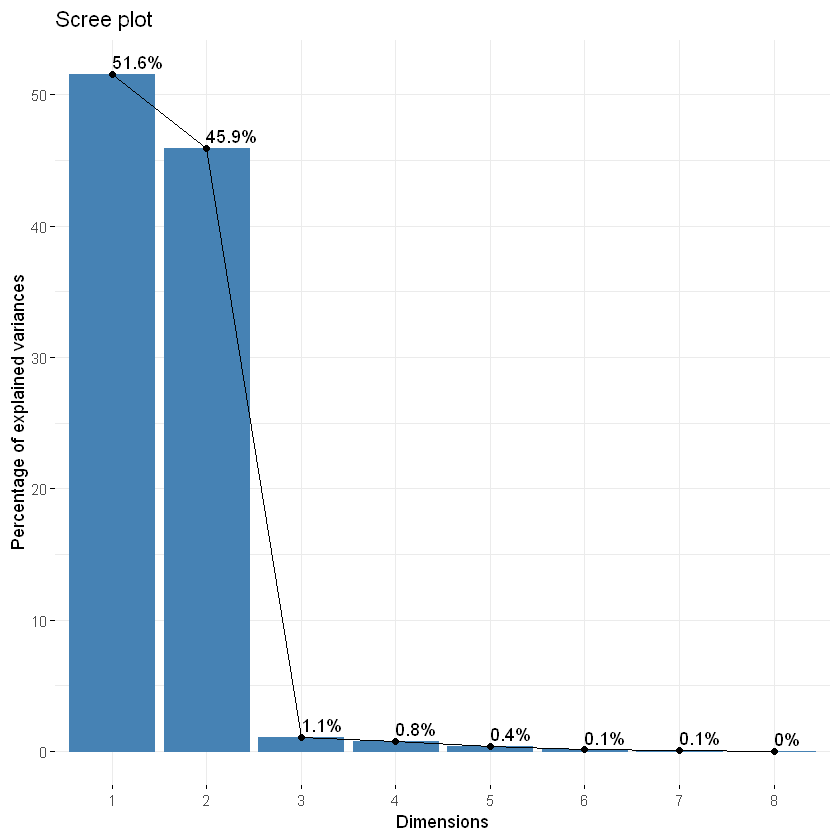

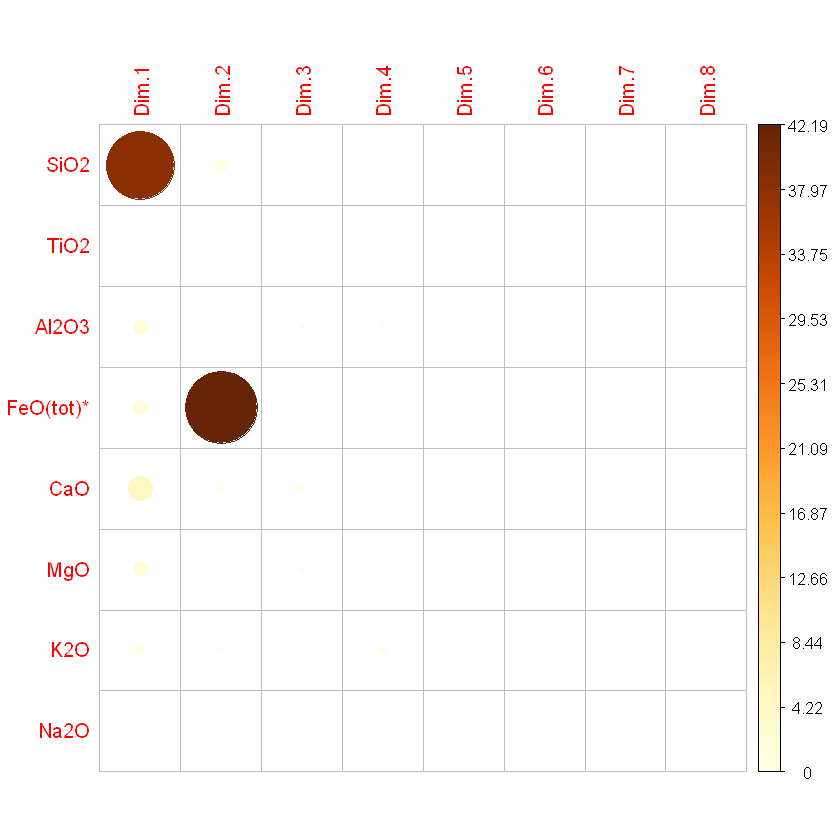

In [15]:
library(factoextra)
library(corrplot)

pca <- prcomp(data, scale = TRUE)
var <- get_pca_var(pca)
ind <- get_pca_ind(pca)

fviz_eig(pca, addlabels = TRUE)
corrplot(var$cos2, is.corr=FALSE)


[1] "RMSE: 5.91238666831086"

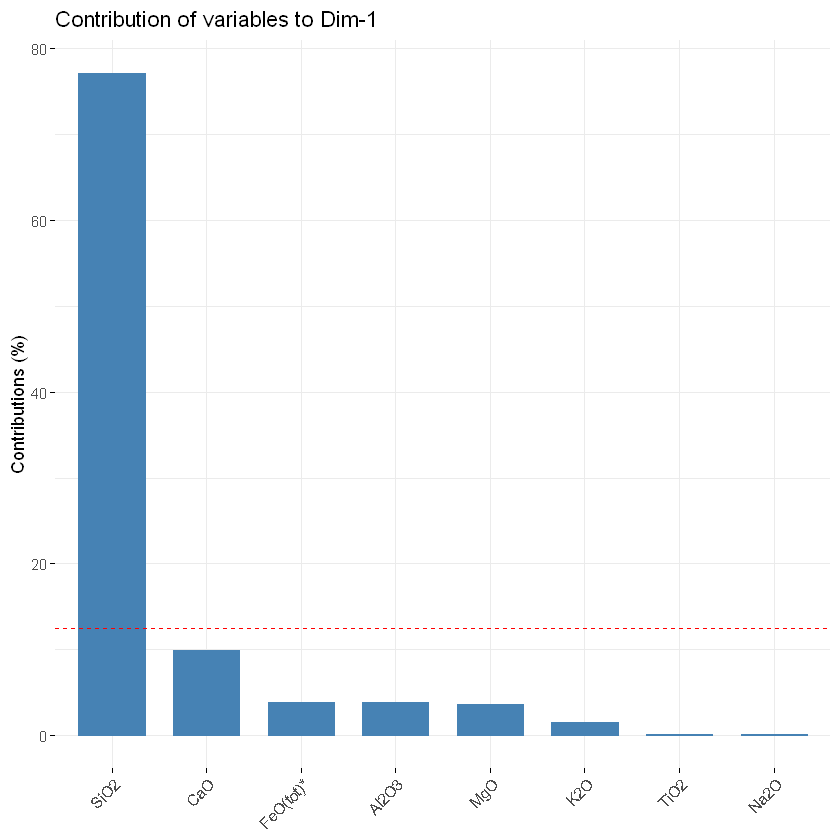

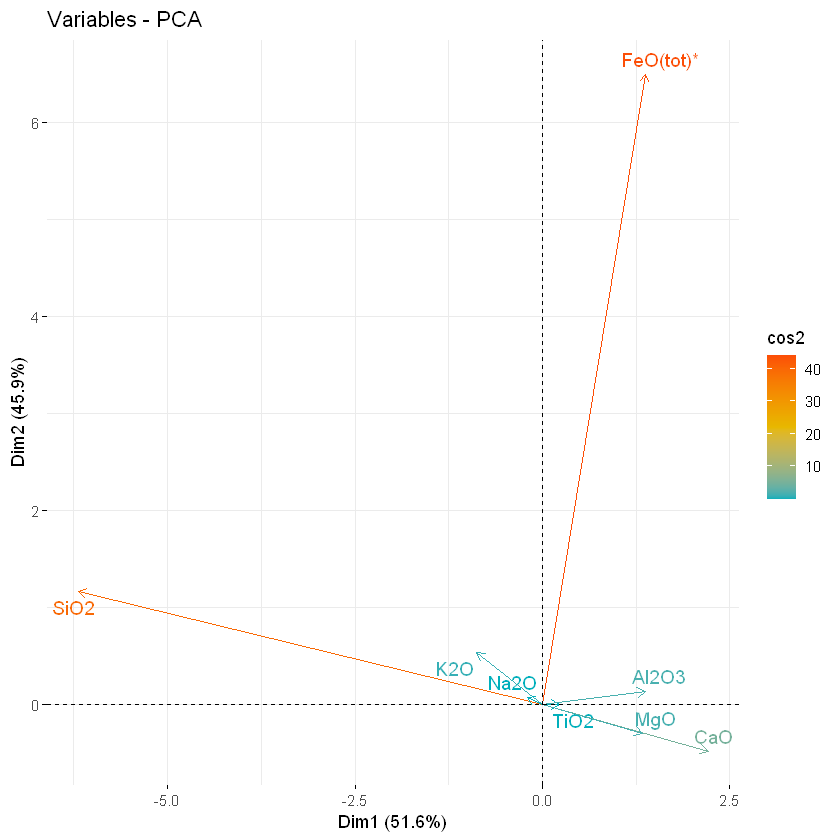

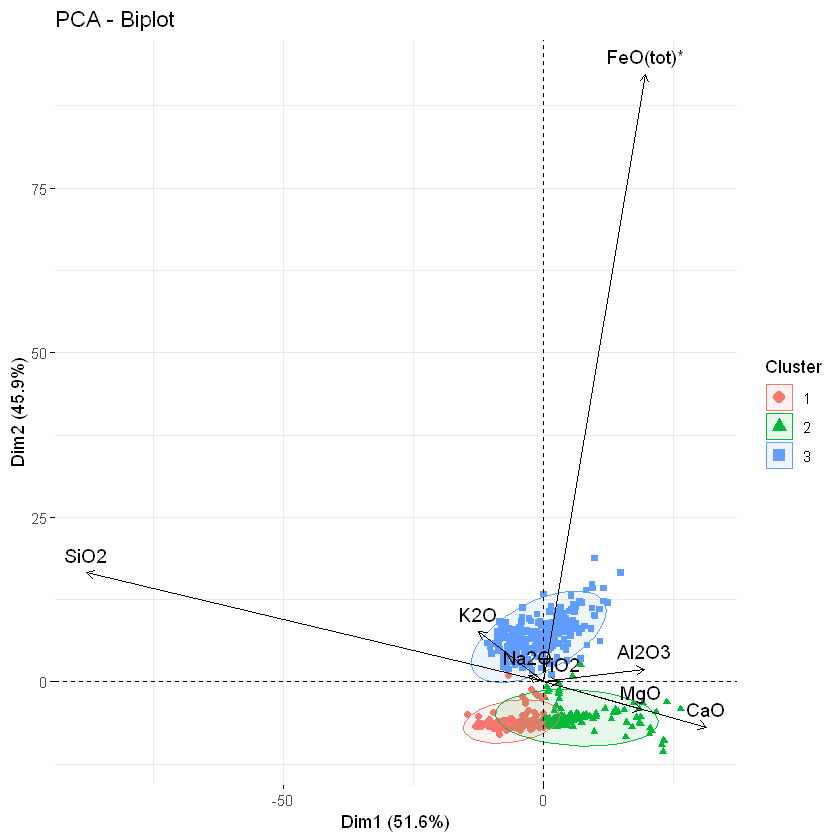

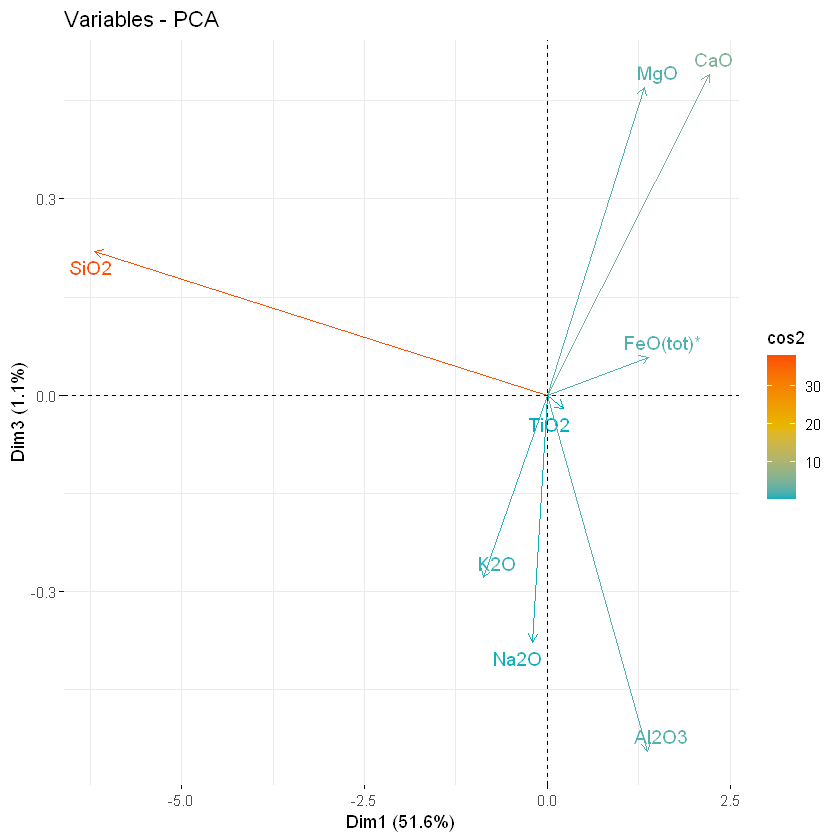

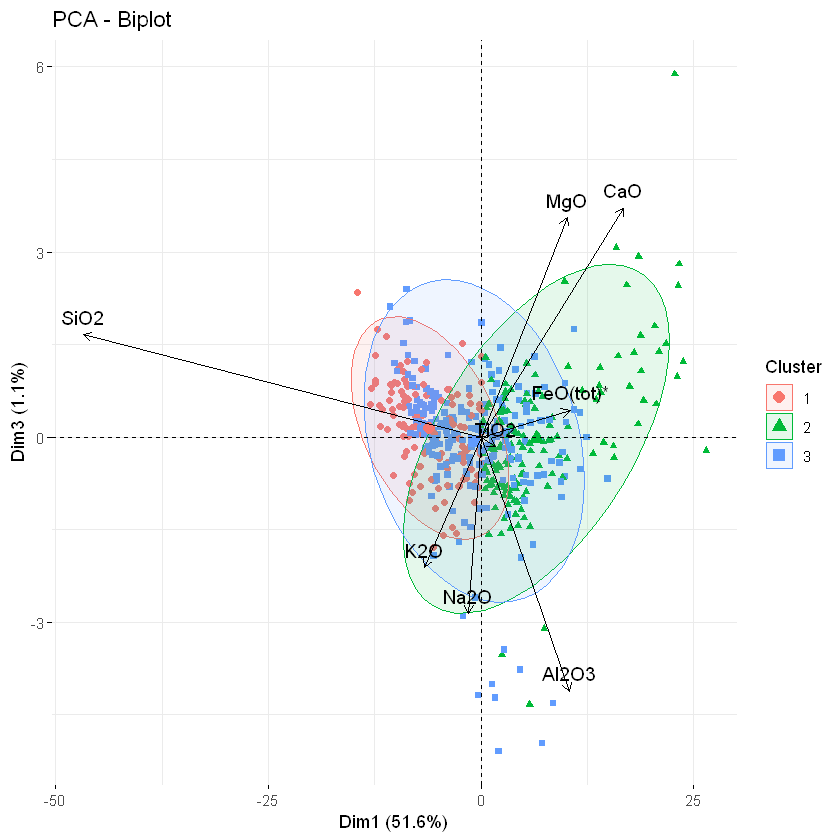

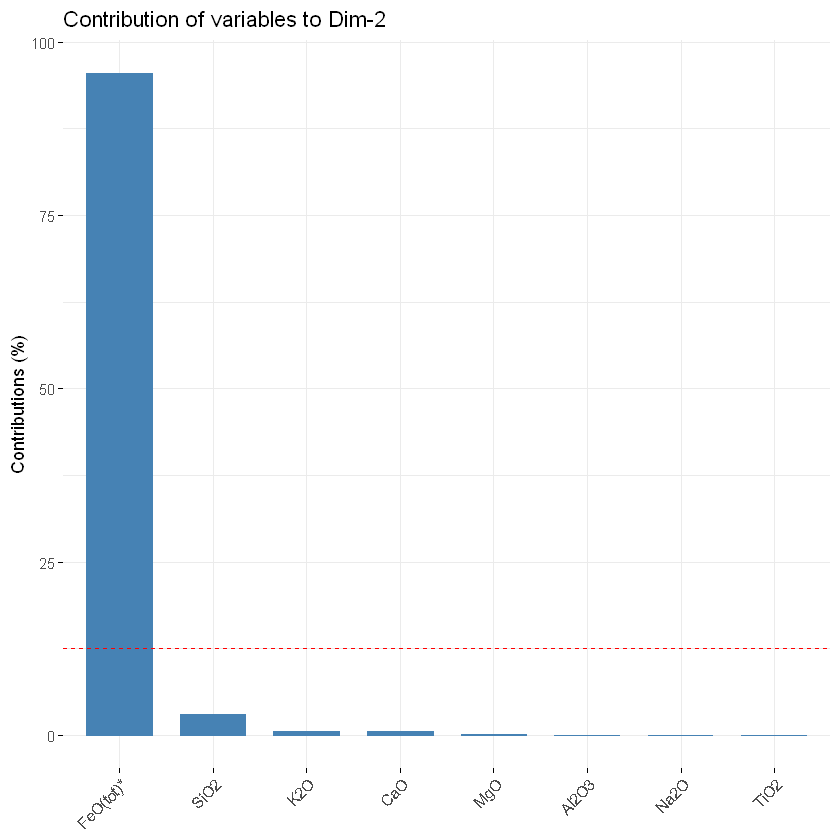

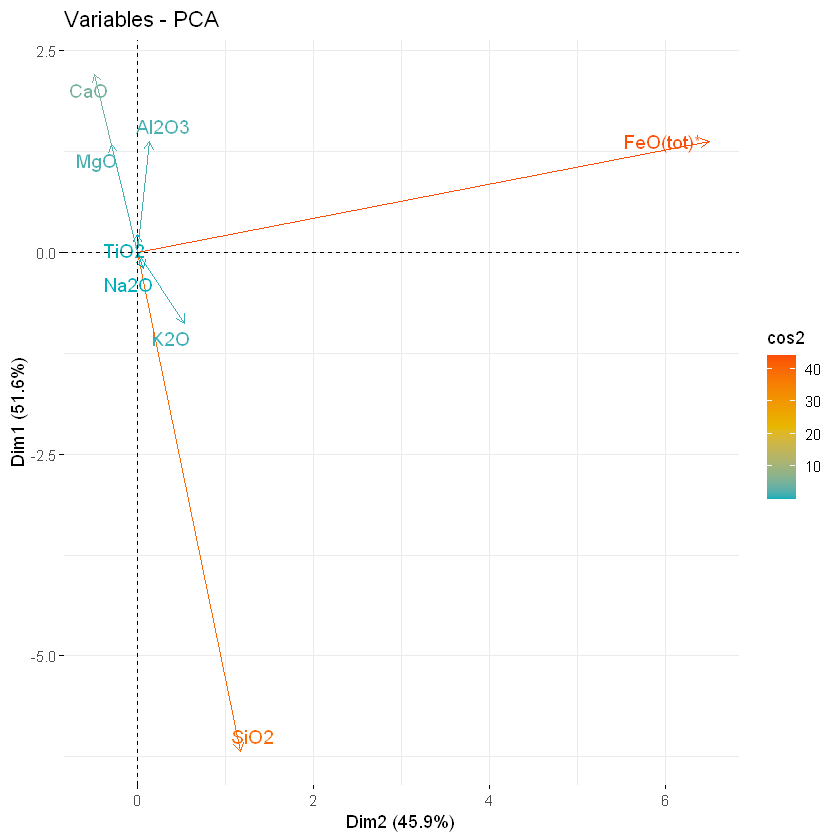

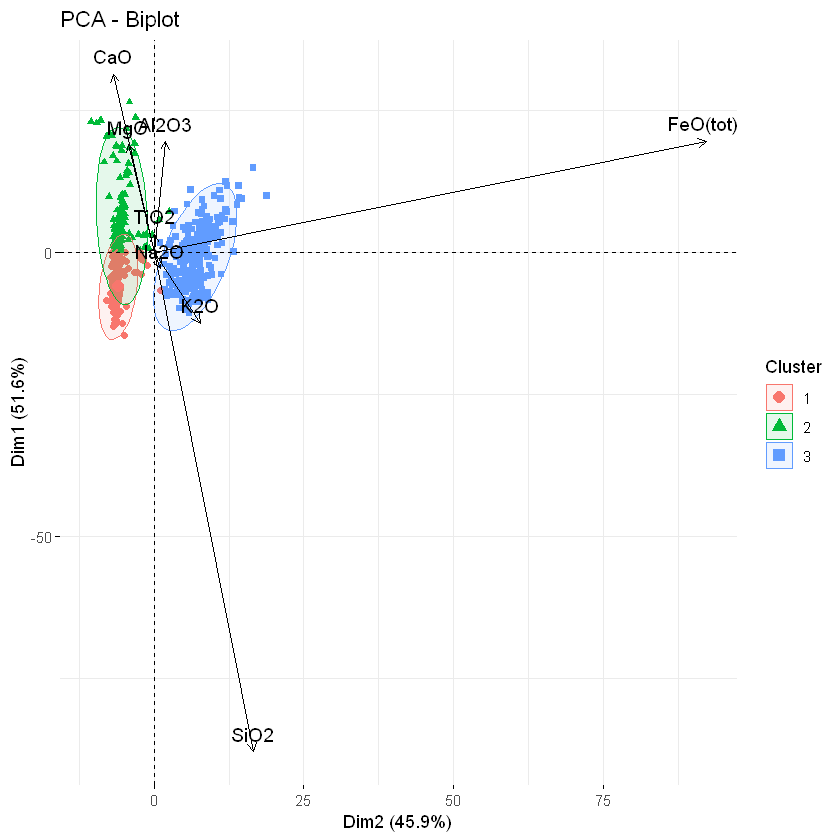

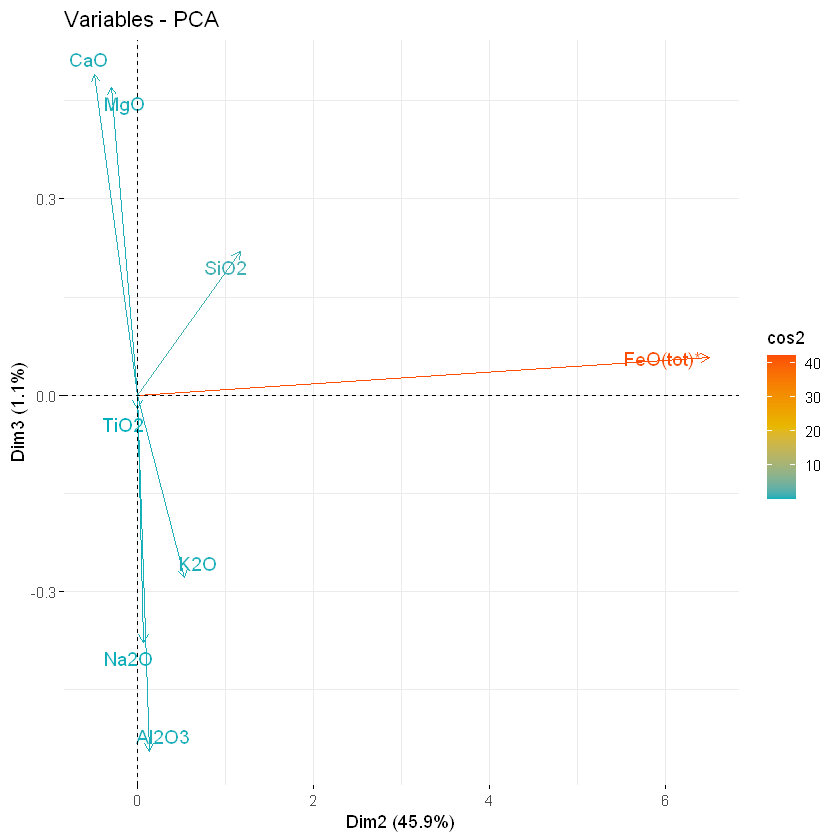

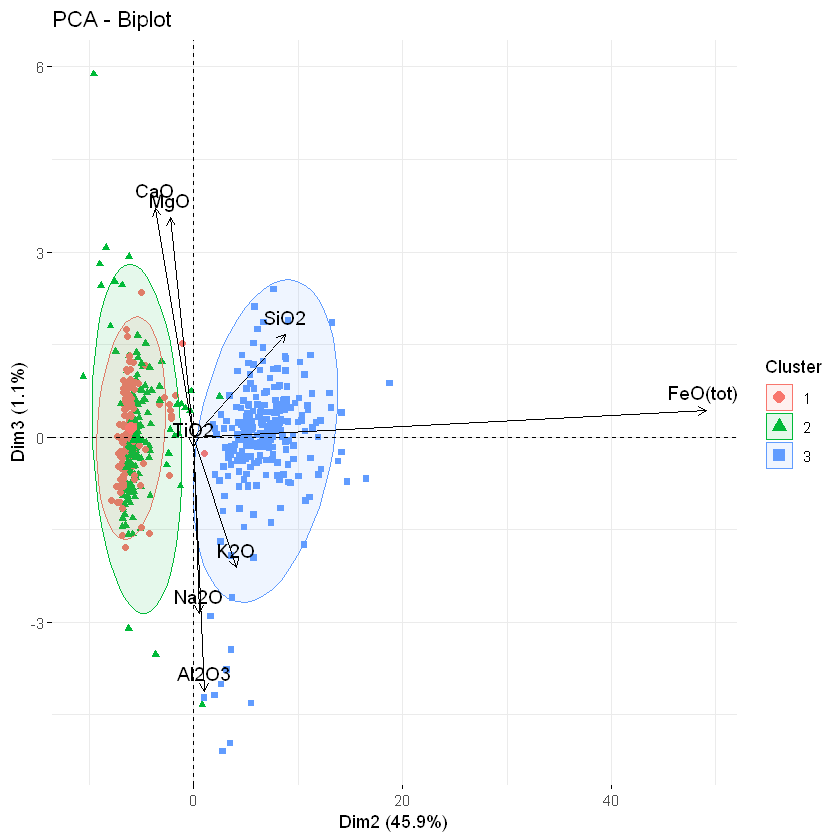

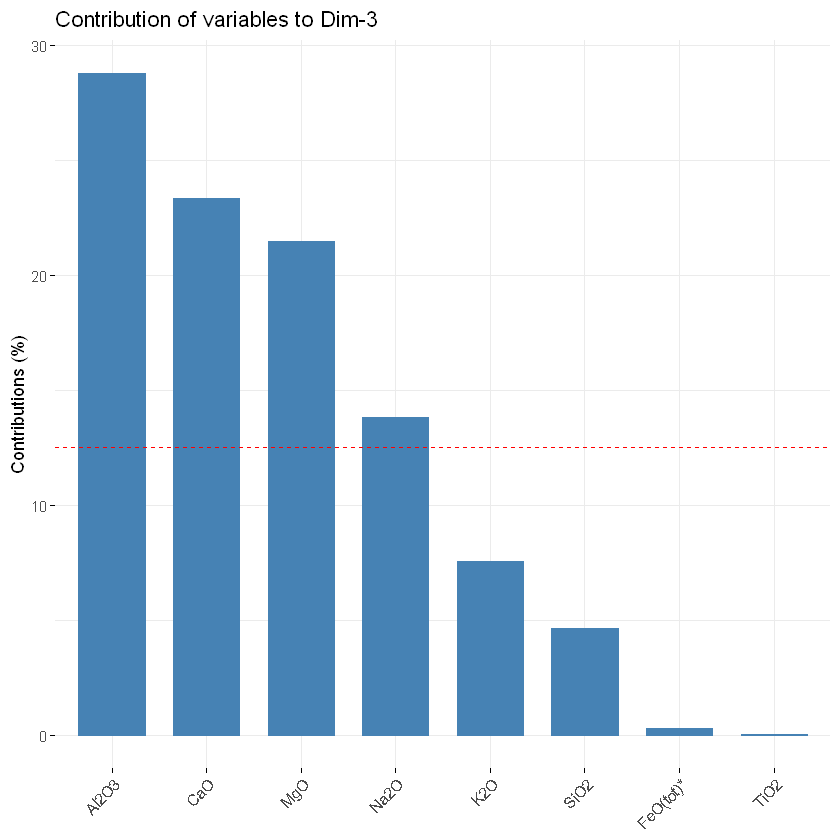

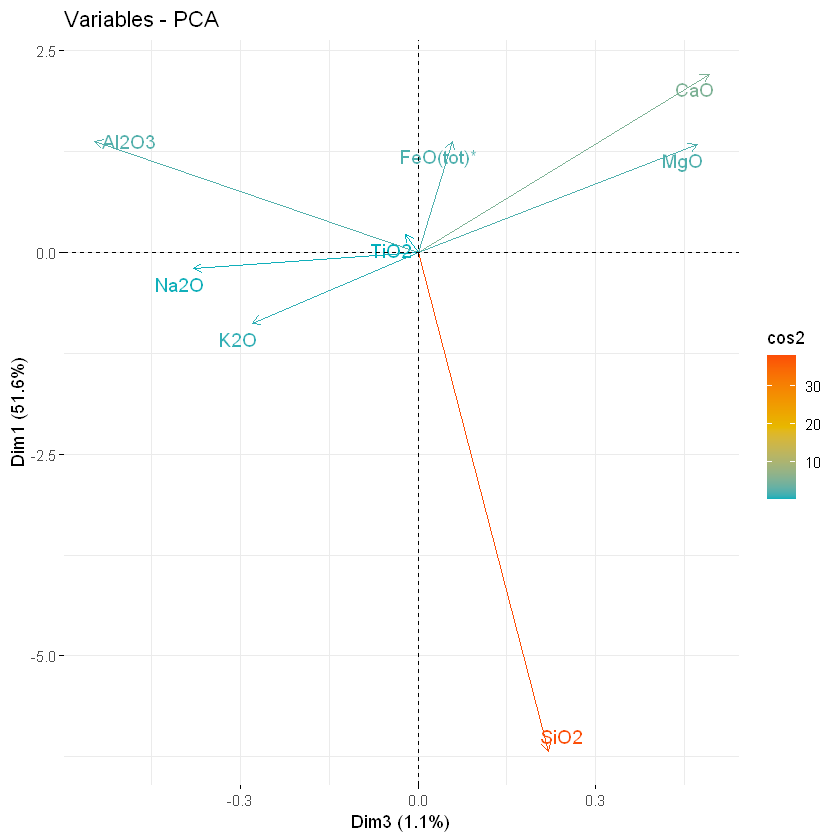

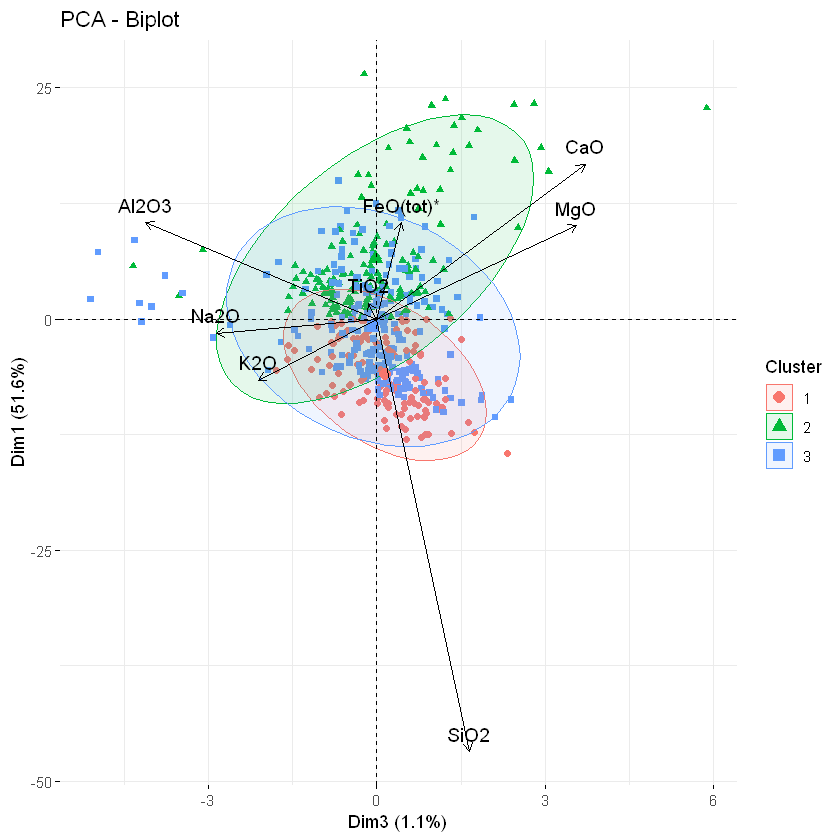

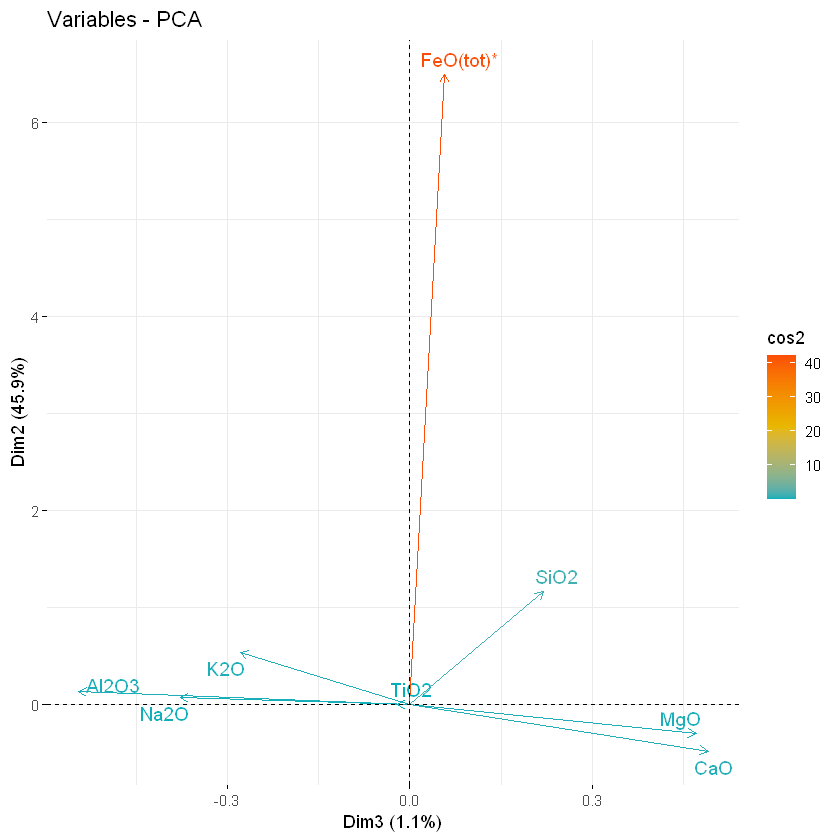

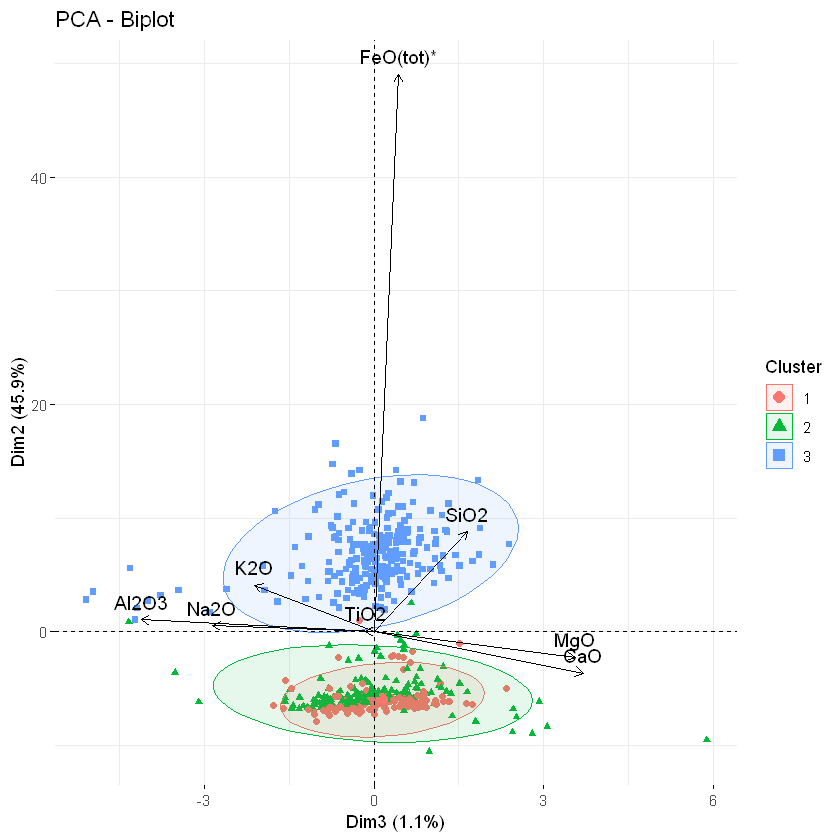

In [16]:
dim <- 3

set.seed(123)
km_var <- kmeans(var$coord, centers = dim, nstart = 25)
km_ind <- kmeans(ind$coord, centers = dim, nstart = 25)
km_var.grp <- as.factor(km_var$cluster)
km_ind.grp <- as.factor(km_ind$cluster)

rmse_ind <- sqrt(sum(km_ind$withinss) / nrow(ind$coord))
sprintf('RMSE: %s', rmse_ind)

for (i in 1:dim) {

  print(fviz_contrib(pca, choice = "var", axes = i, top = 10))

  for (k in 1:dim) {
    if (k == i) {
      next
    }
    print(fviz_pca_var(
      pca, 
      col.var = 'cos2', 
      gradient.cols = c('#00AFBB', '#E7B800', '#FC4E07'), 
      repel = TRUE,
      axes = c(i, k)
    ))

    print(fviz_pca(pca, 
      col.ind = km_ind.grp,
      col.var = 'black',
      geom.ind = "point",
      addEllipses = TRUE, 
      legend.title = "Cluster",
      axes = c(i, k)
    ))
  }
}

In [17]:
# options(rgl.useNULL = TRUE)
# library(rgl)

# scores <- as.data.frame(pca$x)

# plot3d(scores[, 1:3], col = km_ind.grp, main = "PCA Scores")